In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
stocks_df = pd.read_excel("/content/muertes covid y cryptos.xlsx")
stocks_df

,date,new_deaths_per_million,BTC-USD,FTT-USD,ETH-USD,USDT-USD,USDC-USD,XRP-USD,BUSD-USD,DOGE-USD,LTC-USD,MATIC-USD
0,2020-01-27,0.003,8909.819336,2.375446,170.930893,1.001900,1.019121,0.231222,1.003546,0.002368,58.763268,0.016910
1,2020-01-28,0.006,9358.589844,2.443701,176.370316,1.000760,1.024196,0.238488,0.999840,0.002450,60.671818,0.017256
2,2020-01-29,0.000,9316.629883,2.356059,175.050339,1.002296,1.025096,0.235730,1.004144,0.002390,60.077934,0.017110
3,2020-01-30,0.005,9508.993164,2.409496,184.690475,1.001452,1.044029,0.243642,1.002050,0.002440,68.159065,0.018645
4,2020-01-31,0.005,9350.529297,2.371486,180.160172,1.000648,1.028374,0.239233,1.002902,0.002394,67.879494,0.017928
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2022-12-12,0.201,17206.437500,1.483301,1274.619019,1.000107,1.000096,0.387394,0.999950,0.090258,76.221527,0.910573
1051,2022-12-13,0.237,17781.318359,1.405344,1320.549194,1.000017,1.000134,0.395102,1.000064,0.090940,77.344482,0.923434
1052,2022-12-14,0.296,17815.650391,1.371255,1309.328735,1.000105,0.999980,0.386414,1.000252,0.088514,75.475861,0.903347
1053,2022-12-15,0.344,17364.865234,1.356786,1266.353882,1.000078,1.000015,0.378237,0.999825,0.084722,72.335472,0.877981


In [ ]:
# Print out the number of stocks

print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 11


In [ ]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:
  print(i)

Stocks under consideration are:
new_deaths_per_million
BTC-USD
FTT-USD
ETH-USD
USDT-USD
USDC-USD
XRP-USD
BUSD-USD
DOGE-USD
LTC-USD
MATIC-USD


In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1055 non-null   datetime64[ns]
 1   new_deaths_per_million  1055 non-null   float64       
 2   BTC-USD                 1055 non-null   float64       
 3   FTT-USD                 1055 non-null   float64       
 4   ETH-USD                 1055 non-null   float64       
 5   USDT-USD                1055 non-null   float64       
 6   USDC-USD                1055 non-null   float64       
 7   XRP-USD                 1055 non-null   float64       
 8   BUSD-USD                1055 non-null   float64       
 9   DOGE-USD                1055 non-null   float64       
 10  LTC-USD                 1055 non-null   float64       
 11  MATIC-USD               1055 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 

In [ ]:
def show_plot(df, fig_title):
  df.plot(x = 'date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

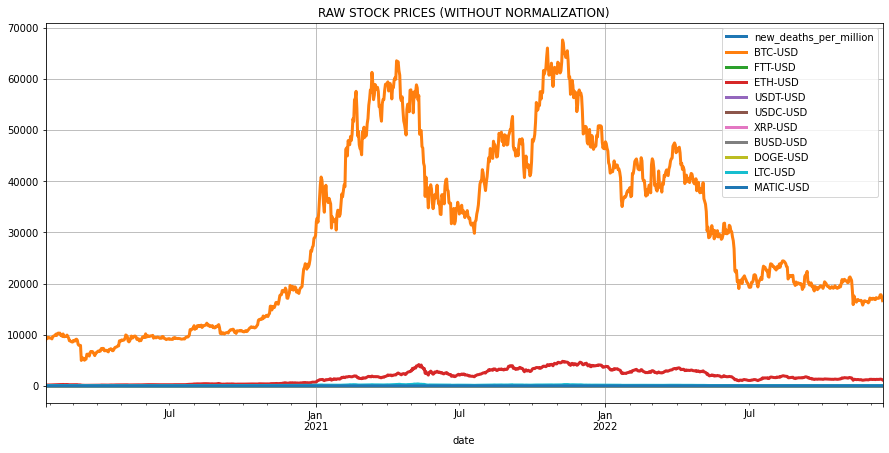

In [ ]:
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [ ]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

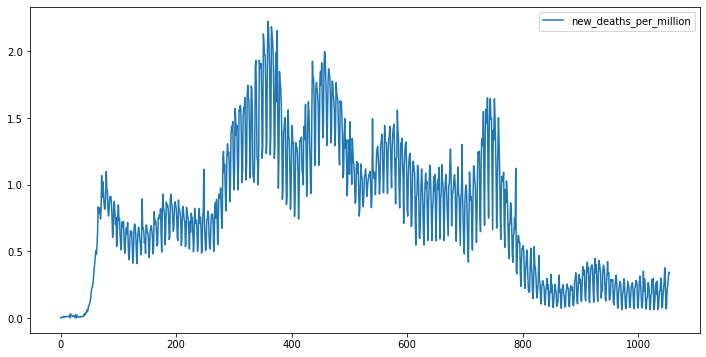

In [ ]:
stocks_df[['new_deaths_per_million']].plot(figsize=(12,6));

#Fuente de "Our World in Data"

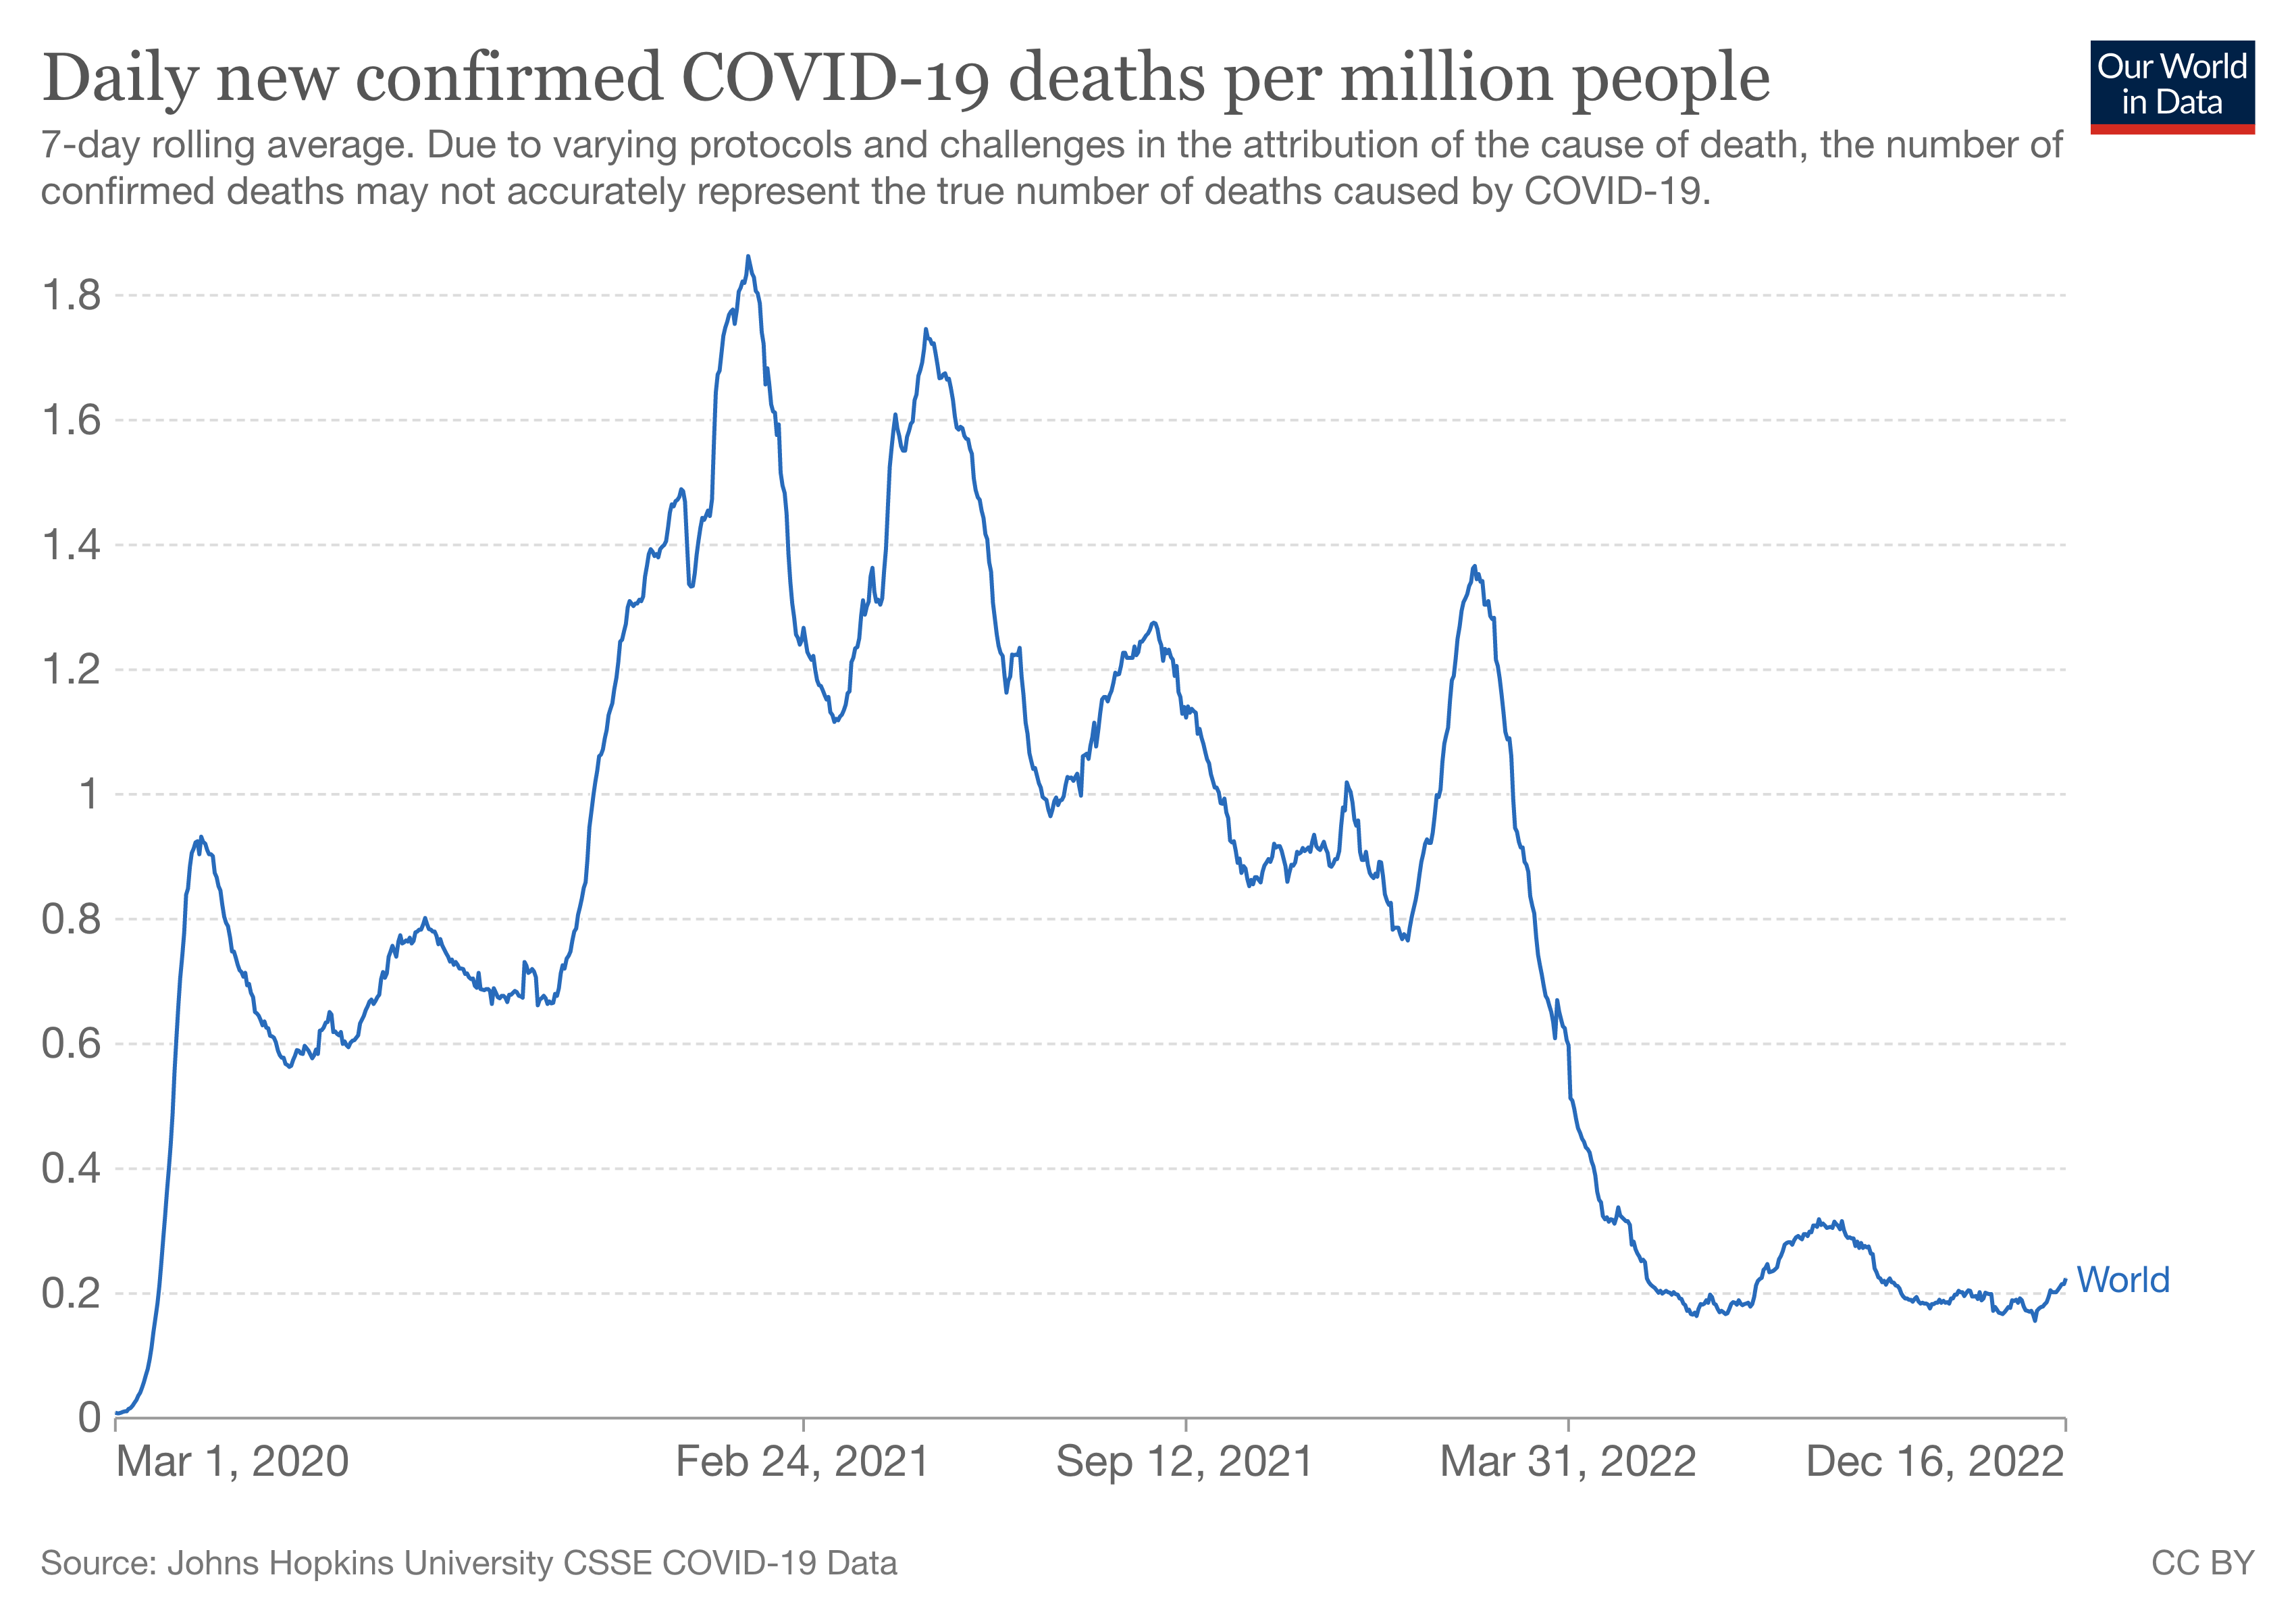

In [3]:
stocks_daily_return = pd.read_excel("/content/stocks_daily_return.xlsx")

In [ ]:
stocks_daily_return.head()

,date,new_deaths_per_million,BTC-USD,FTT-USD,ETH-USD,USDT-USD,USDC-USD,XRP-USD,BUSD-USD,DOGE-USD,LTC-USD,MATIC-USD
0,2020-01-27,0.003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-28,0.006,5.036808,2.873355,3.182235,-0.113784,0.497978,3.142435,-0.369290,3.462838,3.247862,2.046127
2,2020-01-29,0.000,-0.448358,-3.586445,-0.748412,0.153483,0.087874,-1.156452,0.430469,-2.448980,-0.978847,-0.846083
3,2020-01-30,0.005,2.064730,2.268067,5.507065,-0.084207,1.846949,3.356382,-0.208536,2.092050,13.451080,8.971362
4,2020-01-31,0.005,-1.666463,-1.577508,-2.452916,-0.080283,-1.499479,-1.809622,0.085026,-1.885246,-0.410174,-3.845535


In [ ]:
#Describe of the returns
stocks_daily_return.describe()

,new_deaths_per_million,BTC-USD,FTT-USD,ETH-USD,USDT-USD,USDC-USD,XRP-USD,BUSD-USD,DOGE-USD,LTC-USD,MATIC-USD
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,0.787708,0.134914,0.161611,0.316351,0.000384,-0.001264,0.240918,0.000294,0.828707,0.156625,0.683855
std,0.507543,3.836334,6.153350,5.108031,0.331702,0.329740,6.427241,0.347952,13.757596,5.313654,8.170030
min,0.000000,-37.169539,-75.075174,-42.347221,-5.121181,-3.654884,-42.334005,-5.629464,-40.256987,-36.177324,-51.031281
25%,0.318500,-1.521576,-2.295562,-2.161513,-0.025007,-0.027191,-2.238910,-0.049985,-2.561623,-2.409107,-3.500234
50%,0.764000,0.096808,0.177552,0.306959,0.000100,0.000700,0.129293,0.000000,-0.040937,0.168984,0.175829
75%,1.132000,1.802810,2.773030,2.973921,0.025076,0.026148,2.376960,0.041321,2.097195,2.761459,3.641792
max,2.224000,18.746474,52.868608,25.947533,5.484448,4.335231,56.010886,5.507916,355.546645,28.201604,58.052203


In [ ]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['date']).corr()

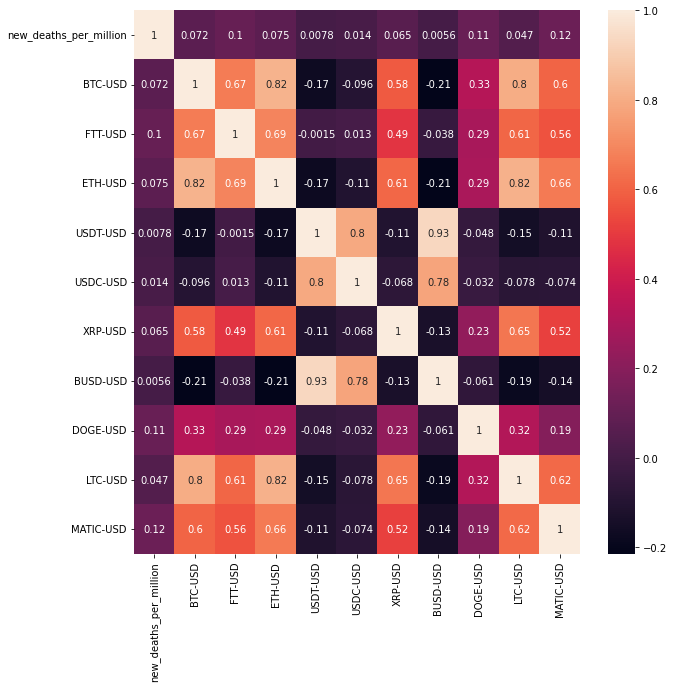

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

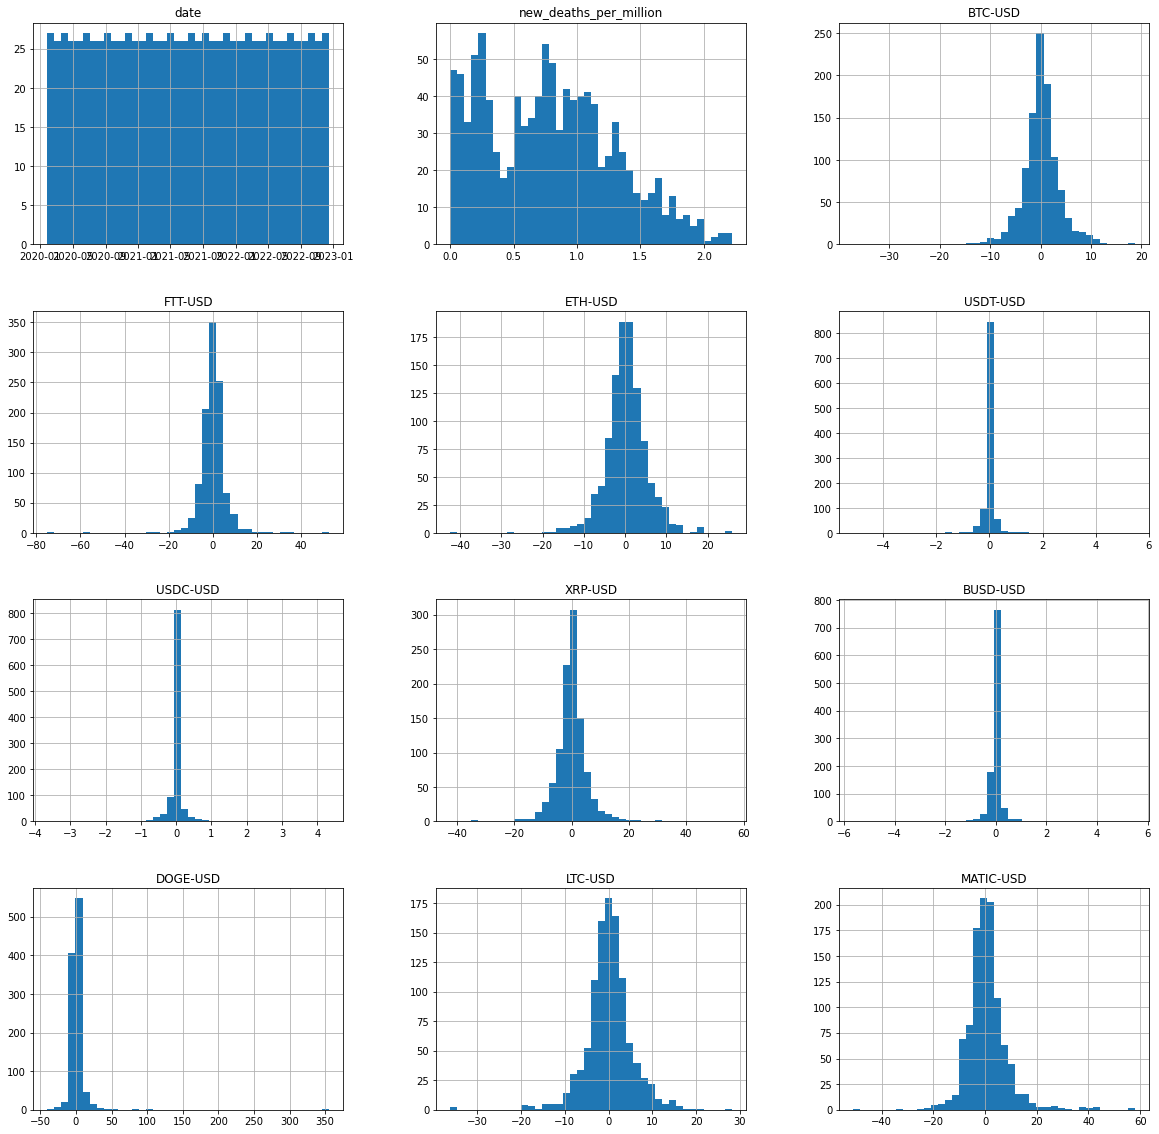

In [ ]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
stocks_daily_return.hist(figsize=(20, 20), bins = 40);

In [ ]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['date'])

data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([0.003, 0.006, 0.   , ..., 0.296, 0.344, 0.333]),
 array([ 0.        ,  5.03680817, -0.44835773, ...,  0.19307923,
        -2.53027617, -4.13122042]),
 array([  0.        ,   2.87335515,  -3.58644531, ...,  -2.42566944,
         -1.05516479, -15.76269213]),
 array([ 0.        ,  3.18223517, -0.74841222, ..., -0.84968126,
        -3.28220498, -7.7462141 ]),
 array([ 0.        , -0.11378381,  0.15348335, ...,  0.00879985,
        -0.00269972,  0.00789938]),
 array([ 0.        ,  0.49797816,  0.08787381, ..., -0.01539794,
         0.00350007, -0.01139983]),
 array([ 0.        ,  3.14243454, -1.15645232, ..., -2.19892585,
        -2.11612416, -6.93982873]),
 array([ 0.        , -0.3692905 ,  0.43046888, ...,  0.0187988 ,
        -0.04268924,  0.04330758]),
 array([  0.        ,   3.46283784,  -2.44897959, ...,  -2.66769298,
         -4.28406806, -10.36330587]),
 array([ 0.        ,  3.24786225, -0.97884655, ..., -2.41597196,
        -4.16078592, -8.30667836]),
 array([ 0.        ,  

In [ ]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()

In [ ]:
# Get the mean values
stocks_df.mean()

<ipython-input-29-f05962e54e72>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



new_deaths_per_million        0.787708
BTC-USD                   29583.522647
FTT-USD                      25.011954
ETH-USD                    1734.599027
USDT-USD                      1.000562
USDC-USD                      1.000690
XRP-USD                       0.557059
BUSD-USD                      1.000271
DOGE-USD                      0.104551
LTC-USD                     109.312785
MATIC-USD                     0.738558
dtype: float64

In [ ]:
# Get the standard deviation of stocks (Volatility)
stocks_df.std()

date                      304 days 16:43:03.680642824
new_deaths_per_million                       0.507543
BTC-USD                                  17066.663117
FTT-USD                                     19.720842
ETH-USD                                   1271.771057
USDT-USD                                     0.002672
USDC-USD                                     0.004229
XRP-USD                                      0.344736
BUSD-USD                                      0.00261
DOGE-USD                                     0.113067
LTC-USD                                     66.359266
MATIC-USD                                    0.700529
dtype: object

In [ ]:
# Statistical data of the dataframe
stocks_df.describe()

,new_deaths_per_million,BTC-USD,FTT-USD,ETH-USD,USDT-USD,USDC-USD,XRP-USD,BUSD-USD,DOGE-USD,LTC-USD,MATIC-USD
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,0.787708,29583.522647,25.011954,1734.599027,1.000562,1.000690,0.557059,1.000271,0.104551,109.312785,0.738558
std,0.507543,17066.663117,19.720842,1271.771057,0.002672,0.004229,0.344736,0.002610,0.113067,66.359266,0.700529
min,0.000000,4970.788086,1.142920,110.605873,0.974248,0.970124,0.139635,0.970006,0.001537,30.930883,0.008096
25%,0.318500,11904.569336,3.544240,401.866287,1.000017,0.999893,0.273794,0.999837,0.003237,54.168413,0.021185
50%,0.764000,28627.574219,26.241205,1579.704590,1.000283,1.000074,0.447702,1.000100,0.067357,81.297447,0.737566
75%,1.132000,43551.312500,41.081953,2753.045044,1.000806,1.000358,0.781942,1.000522,0.169251,154.889657,1.323199
max,2.224000,67566.828125,79.871315,4812.087402,1.053585,1.044029,1.839236,1.052356,0.684777,386.450775,2.876757


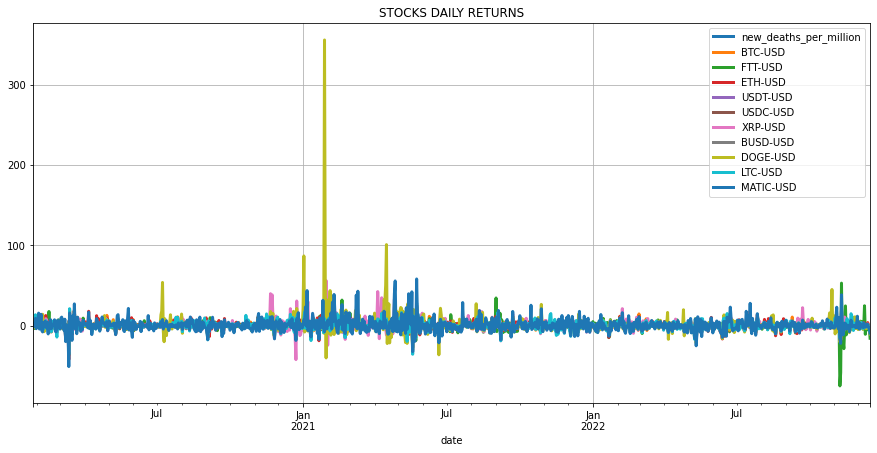

In [ ]:
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [ ]:
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex
from statsmodels.tsa.stattools import adfuller


# Pruebas de cointegracion de orden 0 con datos de retorno


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['BTC-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-10.53230647094037, 9.085334618393915e-19, 8, 1046, {'1%': -3.436617132314828, '5%': -2.864307097893787, '10%': -2.568243313067353}, 5712.3435068087065)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['FTT-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-12.340202135212248, 6.143079908532014e-23, 4, 1050, {'1%': -3.4365931987759417, '5%': -2.864296541617536, '10%': -2.568237690702948}, 6670.411750098405)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['ETH-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-10.077147107800128, 1.2153299733073638e-17, 9, 1045, {'1%': -3.4366231443991118, '5%': -2.864309749608104, '10%': -2.568244725395481}, 6286.59344571951)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['USDT-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.13738814511569, 0.22974872572112653, 22, 1032, {'1%': -3.4367023644255537, '5%': -2.864344690221488, '10%': -2.5682633351736674}, 600.0747996663338)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['XRP-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-33.15736276070568, 0.0, 0, 1054, {'1%': -3.4365694473419928, '5%': -2.8642860655788693, '10%': -2.568232111086707}, 6780.575355921302)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['BUSD-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.1956721381137685, 0.20781996927580726, 22, 1032, {'1%': -3.4367023644255537, '5%': -2.864344690221488, '10%': -2.5682633351736674}, 657.8303786443337)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['DOGE-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-17.311881902959176, 5.547996822955521e-30, 2, 1052, {'1%': -3.436581300425998, '5%': -2.8642912936257905, '10%': -2.5682348955818357}, 8343.68739811887)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['LTC-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-12.292733679466973, 7.761044976043604e-23, 7, 1047, {'1%': -3.4366111317433443, '5%': -2.864304451252086, '10%': -2.5682419034417707}, 6379.108332173799)


In [ ]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['MATIC-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-11.384105296858284, 8.371763909575825e-21, 8, 1046, {'1%': -3.436617132314828, '5%': -2.864307097893787, '10%': -2.568243313067353}, 7235.605607698644)


Pruebas de cointegracion de orden 1 con los datos a nivel

In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['BTC-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.411621973326136, 0.5766918905446066, 0, 1054, {'1%': -3.4365694473419928, '5%': -2.8642860655788693, '10%': -2.568232111086707}, 17739.30612410264)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['FTT-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.525621941795787, 0.5208006121805511, 4, 1050, {'1%': -3.4365931987759417, '5%': -2.864296541617536, '10%': -2.568237690702948}, 4090.5608346168992)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['ETH-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.5875712048660917, 0.4898338550927669, 6, 1048, {'1%': -3.436605142651622, '5%': -2.8643018096684587, '10%': -2.568240496510984}, 12502.981863018069)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['USDT-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.649708153727369, 0.083152510226359, 22, 1032, {'1%': -3.4367023644255537, '5%': -2.864344690221488, '10%': -2.5682633351736674}, -2052.6751752181544)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['XRP-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.4843485856032825, 0.11932907375870677, 21, 1033, {'1%': -3.4366961996098264, '5%': -2.8643419712141074, '10%': -2.5682618869934934}, -1670.881929360974)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['BUSD-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.6497776175387173, 0.08313934401706585, 22, 1032, {'1%': -3.4367023644255537, '5%': -2.864344690221488, '10%': -2.5682633351736674}, -2053.0966644040072)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['DOGE-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.598142588156806, 0.0933817646868243, 22, 1032, {'1%': -3.4367023644255537, '5%': -2.864344690221488, '10%': -2.5682633351736674}, -1975.824119003566)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['LTC-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.5576433545900952, 0.5048280585929577, 15, 1039, {'1%': -3.436659460539809, '5%': -2.864325767240336, '10%': -2.5682532565554537}, 7258.117627726205)


In [ ]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['MATIC-USD'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.9632618505287356, 0.3029100735085969, 22, 1032, {'1%': -3.4367023644255537, '5%': -2.864344690221488, '10%': -2.5682633351736674}, -1296.9059248537005)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 42.4 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(stocks_df["new_deaths_per_million"])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -5.502
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Prueba de causalidad

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'BTC-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5590  , p=0.6422  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=1.6883  , p=0.6395  , df=3
likelihood ratio test: chi2=1.6869  , p=0.6398  , df=3
parameter F test:         F=0.5590  , p=0.6422  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (0.5590130960633796, 0.6421717651325733, 1045.0, 3),
   'ssr_chi2test': (1.6882730441875844, 0.6395441060690521, 3),
   'lrtest': (1.6869198026997765, 0.6398457278891412, 3),
   'params_ftest': (0.5590130960633168, 0.642171765132626, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['BTC-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7410  , p=0.1569  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=5.2581  , p=0.1538  , df=3
likelihood ratio test: chi2=5.2450  , p=0.1547  , df=3
parameter F test:         F=1.7410  , p=0.1569  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.7410426311490617, 0.15687464591098257, 1045.0, 3),
   'ssr_chi2test': (5.258115353020515, 0.153843428516939, 3),
   'lrtest': (5.245018397315107, 0.15471011509195606, 3),
   'params_ftest': (1.741042631149085, 0.15687464591095915, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'FTT-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0702  , p=0.3608  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=3.2321  , p=0.3572  , df=3
likelihood ratio test: chi2=3.2272  , p=0.3579  , df=3
parameter F test:         F=1.0702  , p=0.3608  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.070209170210466, 0.36076340598980167, 1045.0, 3),
   'ssr_chi2test': (3.232134106396393, 0.3572005530417199, 3),
   'lrtest': (3.22717909562607, 0.3579072315017541, 3),
   'params_ftest': (1.0702091702105885, 0.3607634059896861, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['FTT-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2665  , p=0.0207  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=9.8651  , p=0.0197  , df=3
likelihood ratio test: chi2=9.8192  , p=0.0202  , df=3
parameter F test:         F=3.2665  , p=0.0207  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (3.266499266325304, 0.020734591760879405, 1045.0, 3),
   'ssr_chi2test': (9.865140367964267, 0.019747972292470387, 3),
   'lrtest': (9.819172296356555, 0.020167462576128718, 3),
   'params_ftest': (3.2664992663253365, 0.020734591760877084, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'ETH-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8528  , p=0.1359  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=5.5958  , p=0.1330  , df=3
likelihood ratio test: chi2=5.5809  , p=0.1339  , df=3
parameter F test:         F=1.8528  , p=0.1359  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.852841081607672, 0.13588708388695903, 1045.0, 3),
   'ssr_chi2test': (5.595757371821829, 0.1330221351282437, 3),
   'lrtest': (5.580927569460073, 0.1338775846612708, 3),
   'params_ftest': (1.8528410816076402, 0.13588708388695903, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['ETH-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5996  , p=0.0509  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=7.8512  , p=0.0492  , df=3
likelihood ratio test: chi2=7.8220  , p=0.0498  , df=3
parameter F test:         F=2.5996  , p=0.0509  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (2.599649137015624, 0.050927589207838055, 1045.0, 3),
   'ssr_chi2test': (7.851189164039531, 0.04918940539671587, 3),
   'lrtest': (7.822036983452563, 0.049836472330281205, 3),
   'params_ftest': (2.5996491370154753, 0.050927589207850676, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'USDT-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2467  , p=0.8637  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=0.7449  , p=0.8626  , df=3
likelihood ratio test: chi2=0.7447  , p=0.8627  , df=3
parameter F test:         F=0.2467  , p=0.8637  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (0.24665601040005486, 0.8637434046551251, 1045.0, 3),
   'ssr_chi2test': (0.744924754854137, 0.8625897056554618, 3),
   'lrtest': (0.744661137424373, 0.8626522477224237, 3),
   'params_ftest': (0.24665601040010457, 0.8637434046550703, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['USDT-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2756  , p=0.8430  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=0.8323  , p=0.8417  , df=3
likelihood ratio test: chi2=0.8320  , p=0.8418  , df=3
parameter F test:         F=0.2756  , p=0.8430  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (0.27558705331757116, 0.8430395852329209, 1045.0, 3),
   'ssr_chi2test': (0.8322992729858895, 0.8417268877175794, 3),
   'lrtest': (0.8319702060052805, 0.8418058819592824, 3),
   'params_ftest': (0.275587053317615, 0.8430395852328652, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'XRP-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3875  , p=0.2451  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=4.1903  , p=0.2416  , df=3
likelihood ratio test: chi2=4.1820  , p=0.2425  , df=3
parameter F test:         F=1.3875  , p=0.2451  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.3874827340250562, 0.24508726438421516, 1045.0, 3),
   'ssr_chi2test': (4.19033063022304, 0.24163175715743532, 3),
   'lrtest': (4.18200725446286, 0.24246948519835404, 3),
   'params_ftest': (1.3874827340252749, 0.24508726438413347, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['XRP-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6301  , p=0.0489  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=7.9433  , p=0.0472  , df=3
likelihood ratio test: chi2=7.9134  , p=0.0478  , df=3
parameter F test:         F=2.6301  , p=0.0489  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (2.630133501639716, 0.04889628301779188, 1045.0, 3),
   'ssr_chi2test': (7.9432548623683665, 0.04719913016454867, 3),
   'lrtest': (7.913416706592216, 0.047835427005483135, 3),
   'params_ftest': (2.630133501639867, 0.04889628301778037, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'BUSD-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1428  , p=0.9343  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=0.4313  , p=0.9337  , df=3
likelihood ratio test: chi2=0.4312  , p=0.9337  , df=3
parameter F test:         F=0.1428  , p=0.9343  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (0.14281756034717494, 0.9342794310850421, 1045.0, 3),
   'ssr_chi2test': (0.4313226990006547, 0.9336985936863109, 3),
   'lrtest': (0.4312343014557882, 0.9337172608457367, 3),
   'params_ftest': (0.14281756034723617, 0.9342794310849931, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['BUSD-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2112  , p=0.8887  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=0.6377  , p=0.8877  , df=3
likelihood ratio test: chi2=0.6375  , p=0.8878  , df=3
parameter F test:         F=0.2112  , p=0.8887  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (0.21116146420907958, 0.8887002351919566, 1045.0, 3),
   'ssr_chi2test': (0.6377278287501006, 0.8877436958652298, 3),
   'lrtest': (0.6375346098825503, 0.8877884449877497, 3),
   'params_ftest': (0.21116146420914692, 0.8887002351919028, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'DOGE-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0504  , p=0.3694  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=3.1724  , p=0.3658  , df=3
likelihood ratio test: chi2=3.1676  , p=0.3665  , df=3
parameter F test:         F=1.0504  , p=0.3694  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.0504333214031356, 0.3693553883321762, 1045.0, 3),
   'ssr_chi2test': (3.1724091505725323, 0.36579929710381065, 3),
   'lrtest': (3.167635389899715, 0.36649422589147473, 3),
   'params_ftest': (1.0504333214021664, 0.3693553883325639, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['DOGE-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.5147 , p=0.0000  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=31.7553 , p=0.0000  , df=3
likelihood ratio test: chi2=31.2854 , p=0.0000  , df=3
parameter F test:         F=10.5147 , p=0.0000  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (10.51465893500092, 8.129308069693837e-07, 1045.0, 3),
   'ssr_chi2test': (31.755276171160673, 5.893311362874951e-07, 3),
   'lrtest': (31.285431392290775, 7.401779167582574e-07, 3),
   'params_ftest': (10.514658935001153, 8.129308069691007e-07, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'LTC-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1890  , p=0.3127  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=3.5908  , p=0.3092  , df=3
likelihood ratio test: chi2=3.5847  , p=0.3099  , df=3
parameter F test:         F=1.1890  , p=0.3127  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.1889742526114055, 0.3127395413982125, 1045.0, 3),
   'ssr_chi2test': (3.5908160203268866, 0.3091731899974847, 3),
   'lrtest': (3.584701622150078, 0.30994161862476666, 3),
   'params_ftest': (1.1889742526113845, 0.3127395413982125, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['LTC-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2525  , p=0.2894  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=3.7828  , p=0.2859  , df=3
likelihood ratio test: chi2=3.7760  , p=0.2867  , df=3
parameter F test:         F=1.2525  , p=0.2894  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (1.2525428141709394, 0.28943817150937706, 1045.0, 3),
   'ssr_chi2test': (3.7827991593526167, 0.2858932265421578, 3),
   'lrtest': (3.7760142930665097, 0.2866884249745254, 3),
   'params_ftest': (1.252542814170921, 0.28943817150939727, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'MATIC-USD']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3430  , p=0.7942  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=1.0358  , p=0.7926  , df=3
likelihood ratio test: chi2=1.0353  , p=0.7927  , df=3
parameter F test:         F=0.3430  , p=0.7942  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (0.34298494905551924, 0.7942496980843595, 1045.0, 3),
   'ssr_chi2test': (1.0358473676738935, 0.7925788558547017, 3),
   'lrtest': (1.0353377308147174, 0.7927021349072376, 3),
   'params_ftest': (0.3429849490555972, 0.7942496980843031, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(stocks_daily_return[['MATIC-USD', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1619  , p=0.0061  , df_denom=1045, df_num=3
ssr based chi2 test:   chi2=12.5694 , p=0.0057  , df=3
likelihood ratio test: chi2=12.4949 , p=0.0059  , df=3
parameter F test:         F=4.1619  , p=0.0061  , df_denom=1045, df_num=3


{3: ({'ssr_ftest': (4.161921520500539, 0.006081067701636459, 1045.0, 3),
   'ssr_chi2test': (12.569401261913592, 0.005666678016059058, 3),
   'lrtest': (12.49490384456567, 0.005866554964011363, 3),
   'params_ftest': (4.161921520500504, 0.006081067701636459, 1045.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [4]:
stocks_daily_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1055 non-null   datetime64[ns]
 1   new_deaths_per_million  1055 non-null   float64       
 2   BTC-USD                 1055 non-null   float64       
 3   FTT-USD                 1055 non-null   float64       
 4   ETH-USD                 1055 non-null   float64       
 5   USDT-USD                1055 non-null   float64       
 6   USDC-USD                1055 non-null   float64       
 7   XRP-USD                 1055 non-null   float64       
 8   BUSD-USD                1055 non-null   float64       
 9   DOGE-USD                1055 non-null   float64       
 10  LTC-USD                 1055 non-null   float64       
 11  MATIC-USD               1055 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 

In [5]:
dfl = stocks_daily_return[['BTC-USD','FTT-USD','ETH-USD','USDT-USD','XRP-USD','BUSD-USD','DOGE-USD','LTC-USD','MATIC-USD','new_deaths_per_million']]

In [6]:
dfl

,BTC-USD,FTT-USD,ETH-USD,USDT-USD,XRP-USD,BUSD-USD,DOGE-USD,LTC-USD,MATIC-USD,new_deaths_per_million
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003
1,5.036808,2.873355,3.182235,-0.113784,3.142435,-0.369290,3.462838,3.247862,2.046127,0.006
2,-0.448358,-3.586445,-0.748412,0.153483,-1.156452,0.430469,-2.448980,-0.978847,-0.846083,0.000
3,2.064730,2.268067,5.507065,-0.084207,3.356382,-0.208536,2.092050,13.451080,8.971362,0.005
4,-1.666463,-1.577508,-2.452916,-0.080283,-1.809622,0.085026,-1.885246,-0.410174,-3.845535,0.005
...,...,...,...,...,...,...,...,...,...,...
1050,0.597772,-2.634633,0.850602,0.002900,1.478720,-0.000700,-2.817766,-0.530517,1.941263,0.201
1051,3.341080,-5.255643,3.603443,-0.008999,1.989706,0.011401,0.755612,1.473278,1.412407,0.237
1052,0.193079,-2.425669,-0.849681,0.008800,-2.198926,0.018799,-2.667693,-2.415972,-2.175250,0.296
1053,-2.530276,-1.055165,-3.282205,-0.002700,-2.116124,-0.042689,-4.284068,-4.160786,-2.808002,0.344


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen


df = dfl

res = coint_johansen(df, det_order=0, k_ar_diff=1)
res.eig

array([0.61361975, 0.54778695, 0.4466452 , 0.3678733 , 0.34414664,
       0.33876221, 0.29319114, 0.28472335, 0.27038851, 0.04126112])

In [8]:
result = res

print(result.lr1)                           
print(result.cvt)                           
print(result.eig)
print(result.evec)
print(result.lr2)
print(result.max_eig_stat)
print(result.max_eig_stat_crit_vals)
print(result.meth)
print(result.trace_stat)
print(result.trace_stat_crit_vals)
print(result.evec[:,0])

[4917.38026106 3916.047504   3080.38475337 2457.26580448 1974.29110436
 1530.1166922  1094.55191867  729.16618179  376.32074205   44.36976141]
[[232.103  239.2468 253.2526]
 [190.8714 197.3772 210.0366]
 [153.6341 159.529  171.0905]
 [120.3673 125.6185 135.9825]
 [ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]]
[0.61361975 0.54778695 0.4466452  0.3678733  0.34414664 0.33876221
 0.29319114 0.28472335 0.27038851 0.04126112]
[[ 2.68007875e-02 -9.08859492e-02 -6.62223036e-02  3.47819405e-01
  -5.28608779e-01 -1.07009556e-01  2.62862586e-01 -1.88041009e-01
  -5.84612645e-03 -1.24654727e-02]
 [ 1.82884230e-02 -2.32787825e-02  1.34206766e-02 -2.62539807e-01
  -4.86104819e-02  1.21018676e-01  1.06651764e-01  1.72648088e-02
   1.06451985e-01  4.03892584e-03]
 [-1.43249910e-02 -4.10479101e-03  4.58530431e-02 -7.06523590e-03
  -8.67859918e-05  2.95953675e-02 -5.711340